In [1]:
import torch
import torch.nn as nn
import numpy
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.init
import matplotlib.pyplot as plt

In [2]:
rate=0.001
epoch=20
batch_size = 32

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

print(device)

cuda


In [4]:
mnist_train = datasets.MNIST(
    root='MNIST_data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

mnist_test = datasets.MNIST(
    root='MNIST_data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

print(mnist_train[1])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [5]:
data = torch.utils.data.DataLoader(mnist_train, batch_size, shuffle=True)

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(3*3*128, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [7]:
model = CNN().to(device)
cr = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=rate)

[Epoch: 0] cost = 0.12913483381271362
[Epoch: 5] cost = 0.012231272645294666
[Epoch: 10] cost = 0.006741924211382866
[Epoch: 15] cost = 0.004728368483483791


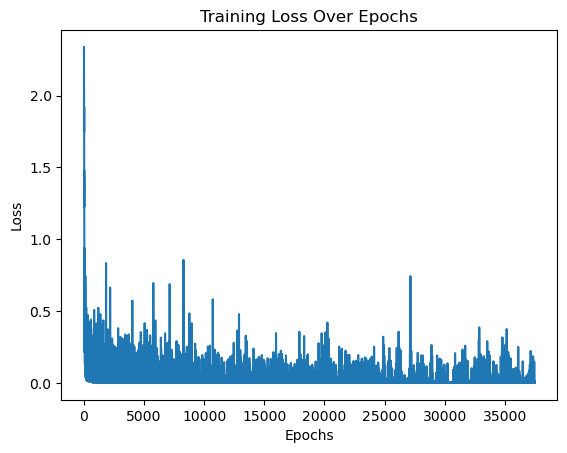

In [8]:
import matplotlib.pyplot as plt

loss = []  # loss를 저장할 리스트 초기화
total_batch = len(data)

for epoch in range(epoch):
    model.train()  # 모델을 훈련 모드로 설정

    avg_cost = 0
    for x, y in data:
        optimizer.zero_grad()
        x = x.to(device)
        y = y.to(device)

        hy = model(x)
        cost = cr(hy, y)
        loss.append(cost.item())  # loss를 리스트에 추가
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    if epoch % 5 == 0:
        print('[Epoch: {}] cost = {}'.format(epoch, avg_cost))

# Loss 시각화
plt.plot(loss)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [9]:
model.eval()

with torch.no_grad():
    x_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
    y_test = mnist_test.targets.to(device)
    pr = model(x_test)
    _, predictions = torch.max(pr, 1)
    correct_predictions = (predictions == y_test).float().sum()
    accuracy = correct_predictions / len(y_test)
    print("Accuracy:", accuracy.item() * 100)

print("테스트 완료")


Accuracy: 98.3299970626831
테스트 완료
